In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'

## F_Structural

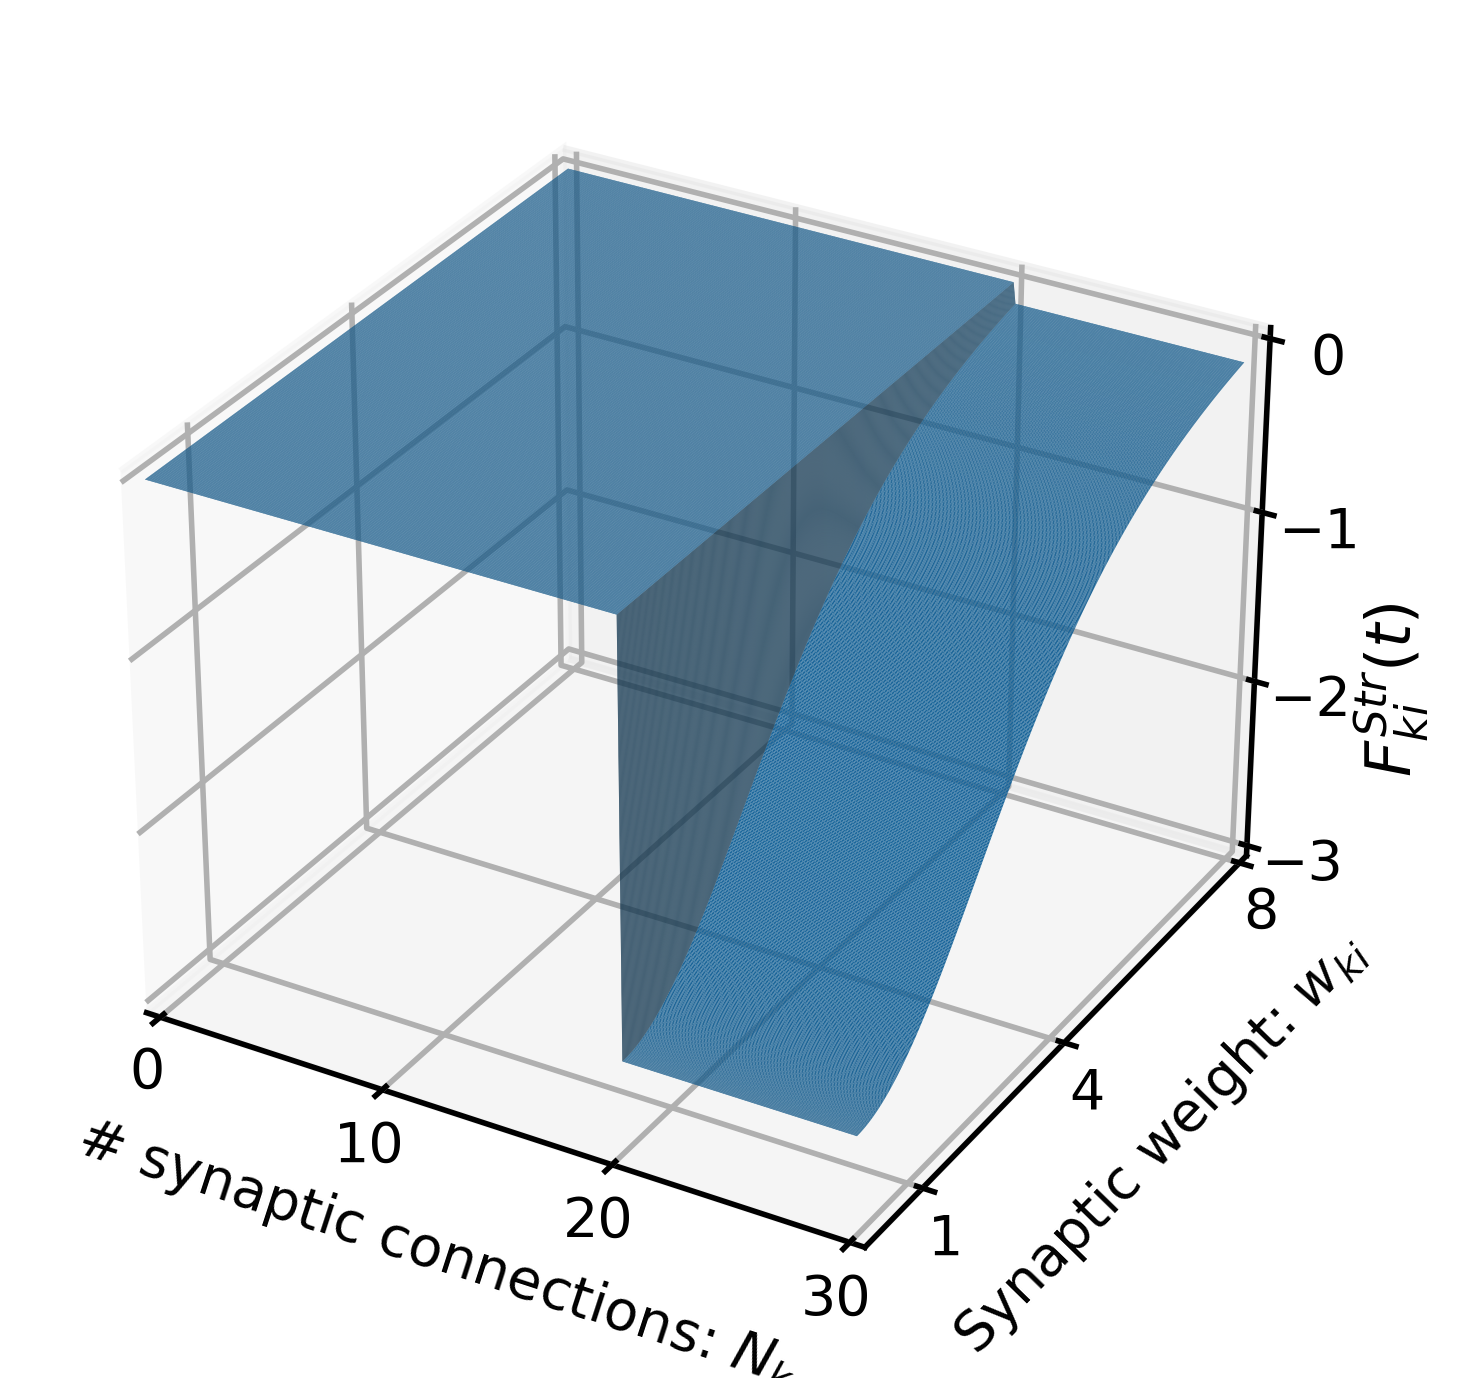

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

gamma = 10
c_w = 0.55
c_theta = 1
N_syn = 20
N = np.arange(0,30,0.1)
w = np.arange(0,8,0.01)
fs = []
for w_i in w:
    fs.append(- gamma * np.heaviside(N - N_syn,0) * der_sigmoid(c_w * w_i) )

fs = np.array(fs)

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = fs
nrows, ncols = z.shape
x = N
y = w
x, y = np.meshgrid(x, y)


# Set up plot
fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=500,subplot_kw=dict(projection='3d'))
ax.tick_params(axis='both', which='major',pad = 10)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1,
                       linewidth=0, antialiased=True, shade=True)
# surf = ax.plot_wireframe(x, y, z,rstride=50, cstride=10)
ax.set_xticks([0,10,20,30])
ax.set_yticks([1,4,8])
ax.set_zticks([-3,-2,-1, 0])

ax.tick_params(axis='x', pad=-5)  
ax.tick_params(axis='y', pad=-5) 
ax.tick_params(axis='z', pad=-3)

# ax.set_zlabel('$f^{Struc}_{ki}$', labelpad=-9)
ax.set_xlabel('# synaptic connections: $N_k$', labelpad=-8)
ax.set_ylabel("Synaptic weight: $w_{ki}$", labelpad=-8)

z_label = '$F^{Str}_{ki}(t)$'
ax.text2D(1.05, 0.5, z_label, transform=ax.transAxes, rotation=90, ha='center', va='center', fontsize=plt.rcParams['axes.labelsize'])


plt.xlim(0,30)
plt.ylim(0,8)
plt.show()
fig.savefig("Figures/pdf/F_Str.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/F_Str.svg", format='svg',bbox_inches='tight')

## F_Functional

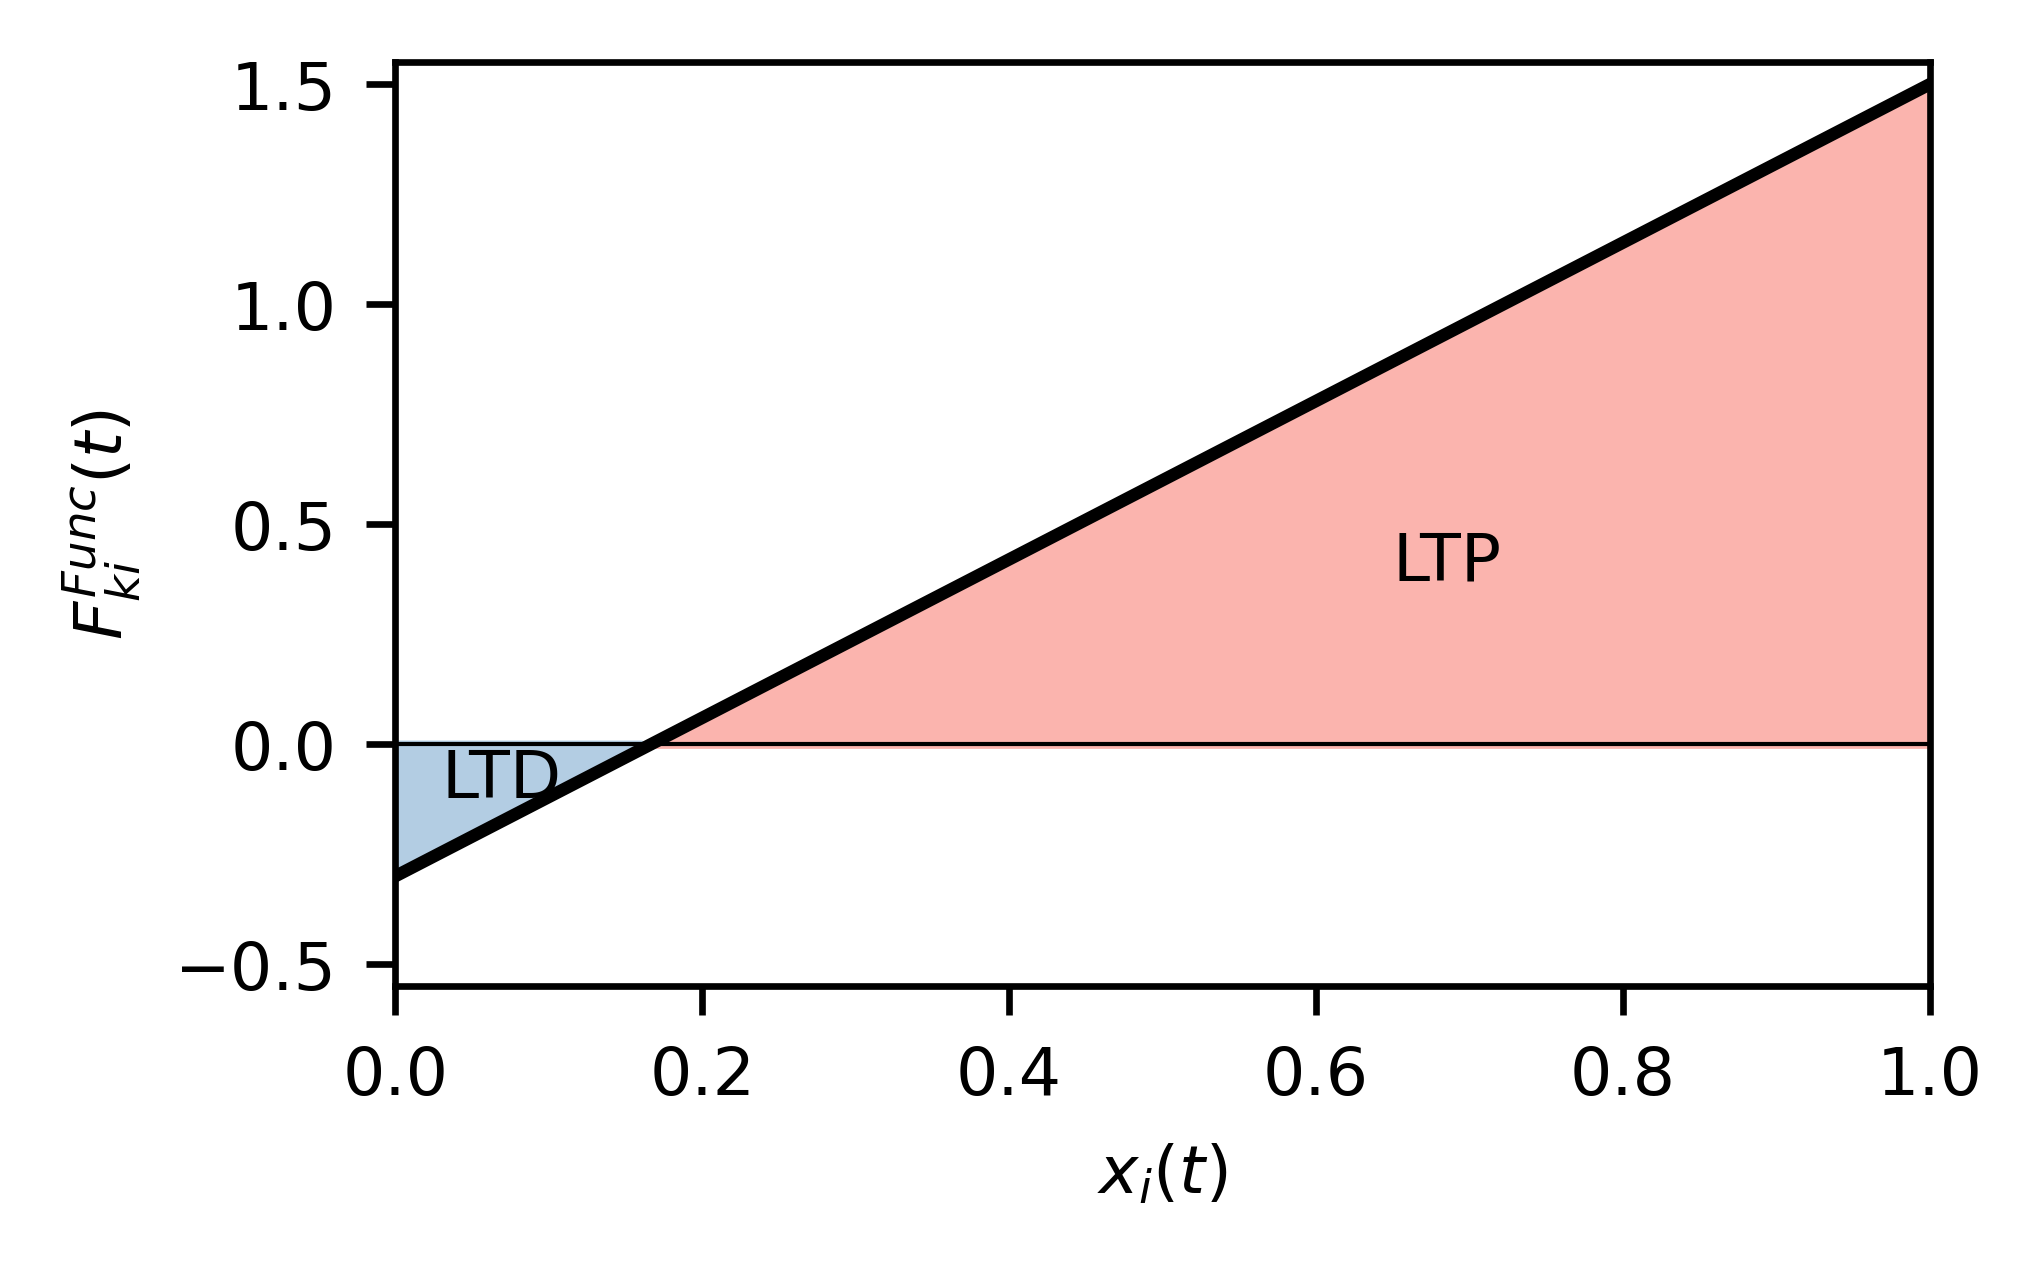

In [12]:
xi = np.arange(0,1.1,0.01)
y = 1.5 * (xi - 0.2*(1-xi))
font_s = 120
# xi = 0.2/1.2
fig, ax = plt.subplots(figsize=(3.3, 2.0), dpi=600)
ax.plot(xi, y , color = "black")
ax.set_xlabel("$x_i(t)$" )
# ax.set_xlabel("$\sum$traces(inputs from preneuron i until t)", size= font_s )
# plt.ylabel("\u03C3($c_w w_{ki})")
ax.set_ylabel("$F^{Func}_{ki}(t)$" )
ax.hlines(0,-0.05,1.05,color = 'black',linewidth = 0.5 )
ax.set_xlim(-0.0,1.05)
ax.fill_between(xi, y, where=(y < 0) , color =plt.get_cmap('Pastel1')(1))
ax.fill_between(xi, y, where=(y > 0) , color = plt.get_cmap('Pastel1')(0))
ax.text(0.03, -0.12 ,"LTD")
ax.text(0.65, 0.375 ,"LTP")
plt.xticks()
plt.yticks([-0.5,0.0,0.5,1.0,1.5])
plt.xlim(0,1)
plt.ylim(-.55,1.55)

# ax.grid()

fig.savefig("Figures/pdf/F_Func.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/F_Func.svg", format='svg',bbox_inches='tight')

## F_STDP

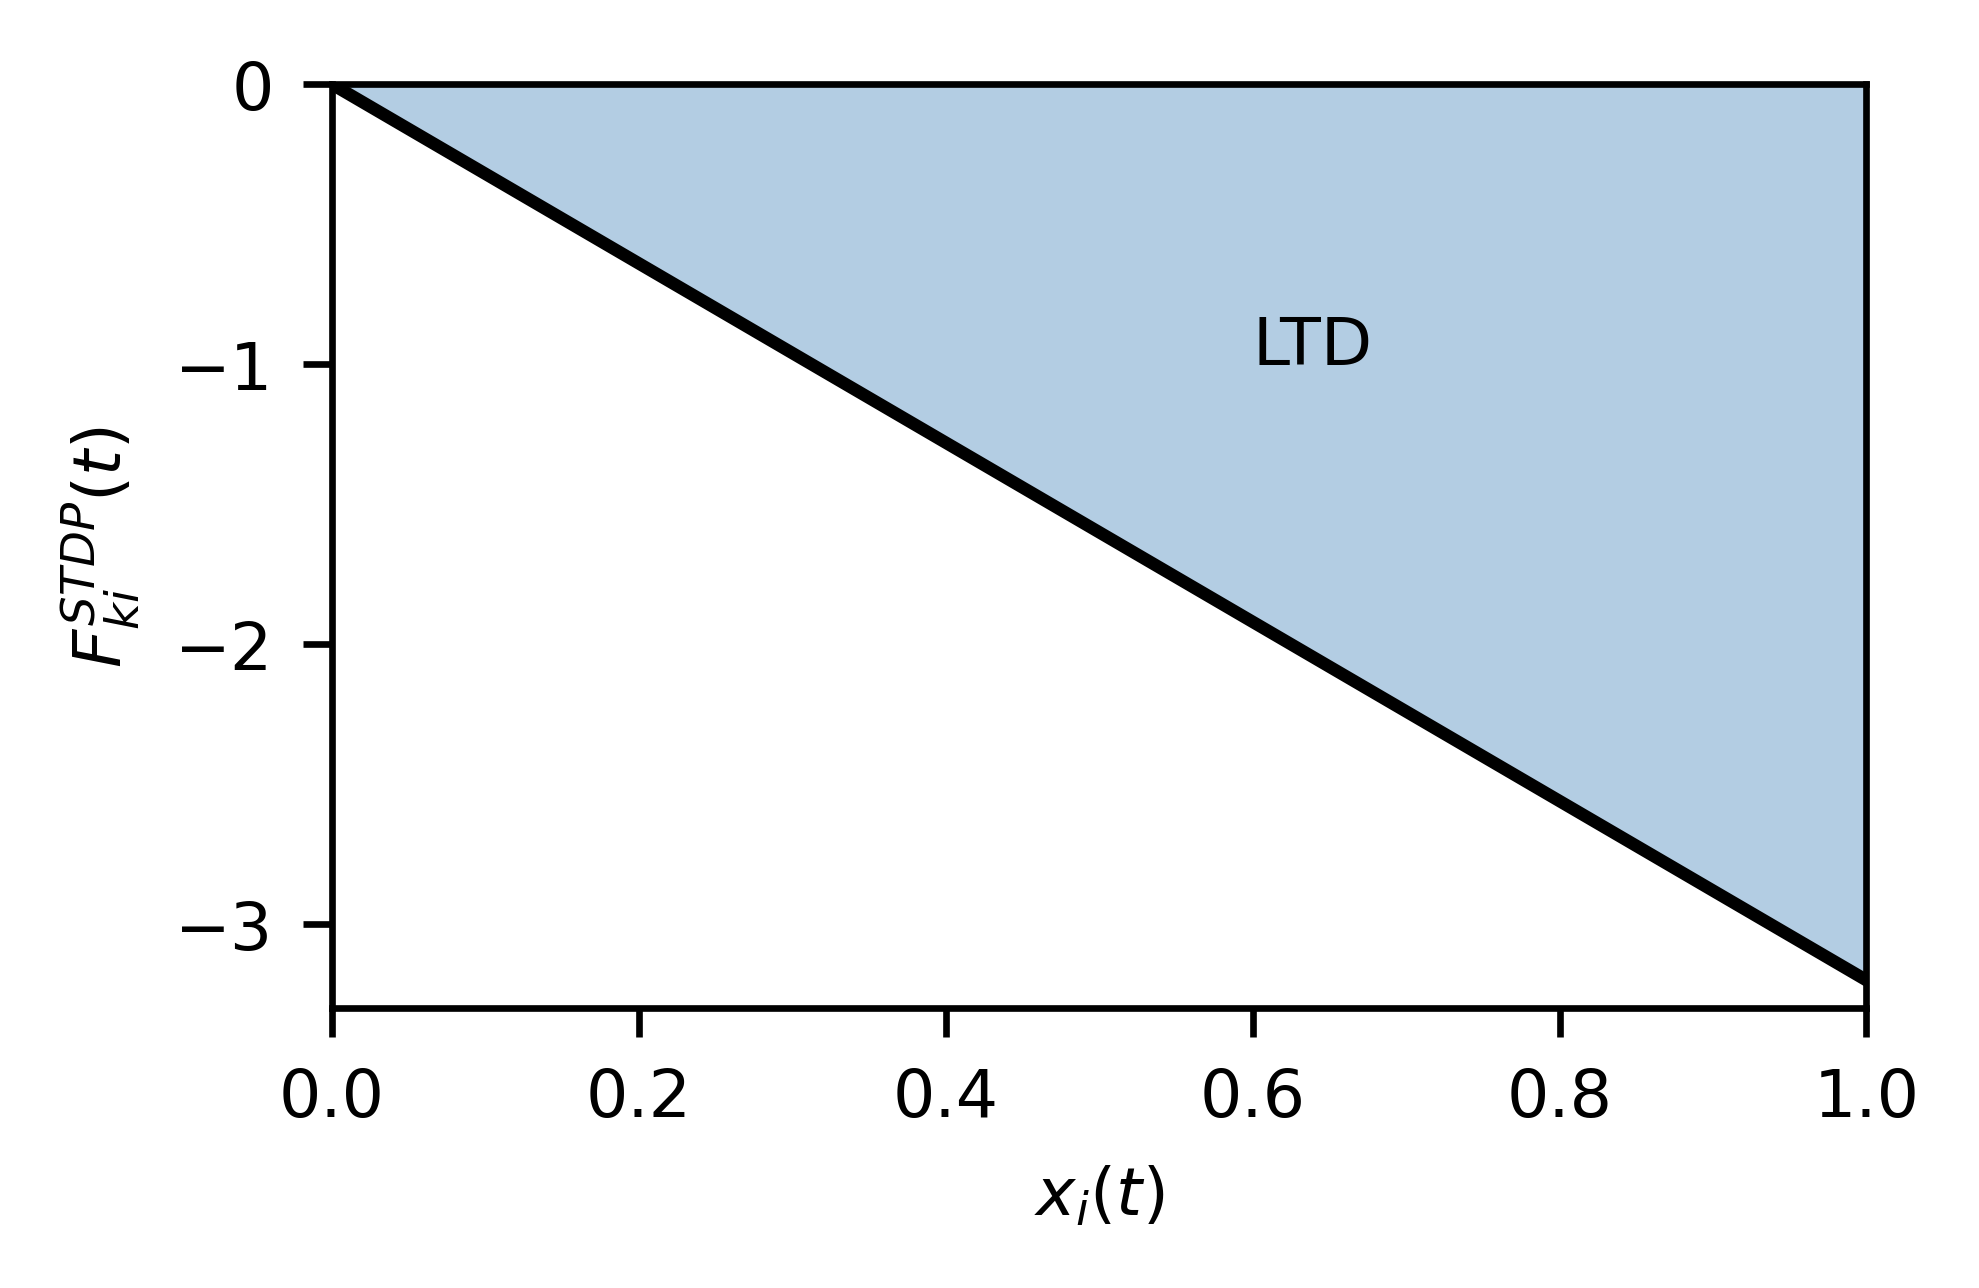

In [11]:
xi = np.arange(0,1.1,0.01)
y = -3.2 * xi

fig, ax = plt.subplots(figsize=(3.3, 2.0), dpi=600)
ax.plot(xi, y , color = "black")
ax.set_xlabel("$x_i(t)$")
ax.set_ylabel("$F^{STDP}_{ki}(t)$" )
plt.xticks()
plt.yticks([-3.0,-2.0,-1.0,0.0])
ax.hlines(0,-0.05,1.05,color = 'black' , linewidth = 0.5)
ax.set_xlim(-0.0,1.05)
ax.fill_between(xi, y, where=(y < 0) , color = plt.get_cmap('Pastel1')(1))
ax.text(0.6, -1 ,"LTD")
plt.xticks()
plt.yticks()
plt.ylim(-3.3,0)
plt.xlim(0,1)

fig.savefig("Figures/pdf/F_STDP.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/F_STDP.svg", format='svg',bbox_inches='tight')